In [1]:
import numpy as np
import json
et_predict = np.load("../ElaTBoT-DFT/algorithm_comparison/MatTen_result/elastic_tensors_predicted_test_set.npy")
et_real = np.load("../ElaTBoT-DFT/algorithm_comparison/MatTen_result/elastic_tensors_real_test_set.npy")

In [2]:
from pymatgen.analysis.elasticity import ElasticTensor
et_real = [np.round(ElasticTensor(i).voigt, 1) for i in et_real]
et_predict = [np.round(ElasticTensor(i).voigt, 1) for i in et_predict]

In [3]:
et_real_mean = [np.mean(i) for i in et_real]
et_predict_mean = [np.mean(i) for i in et_predict]

In [4]:
from sklearn.metrics import mean_absolute_error,r2_score

In [5]:
mae = mean_absolute_error(et_real_mean,et_predict_mean)
r2 = r2_score(et_real_mean,et_predict_mean)
print("MAE:",mae)
print("R2:",r2)


MAE: 2.4268234165067177
R2: 0.9628178936092031


In [6]:
def calculate_properties(stiffness_matrix: list) -> (float, float, float):
    elastic_constant = np.asarray(stiffness_matrix)
    elastic_tensor = ElasticTensor.from_voigt(elastic_constant)
    bulk_modulus = round(elastic_tensor.k_voigt, 3)
    return bulk_modulus
k_voigt_predict = [calculate_properties(i) for i in et_predict]
k_voigt_real = [calculate_properties(i) for i in et_real]
mae = mean_absolute_error(k_voigt_real,k_voigt_predict)
r2 = r2_score(k_voigt_real,k_voigt_predict)
print("MAE:",mae)
print("R2:",r2)

MAE: 7.976259117082533
R2: 0.9587553559339896


In [7]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import scienceplots
plt.style.use('ieee')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

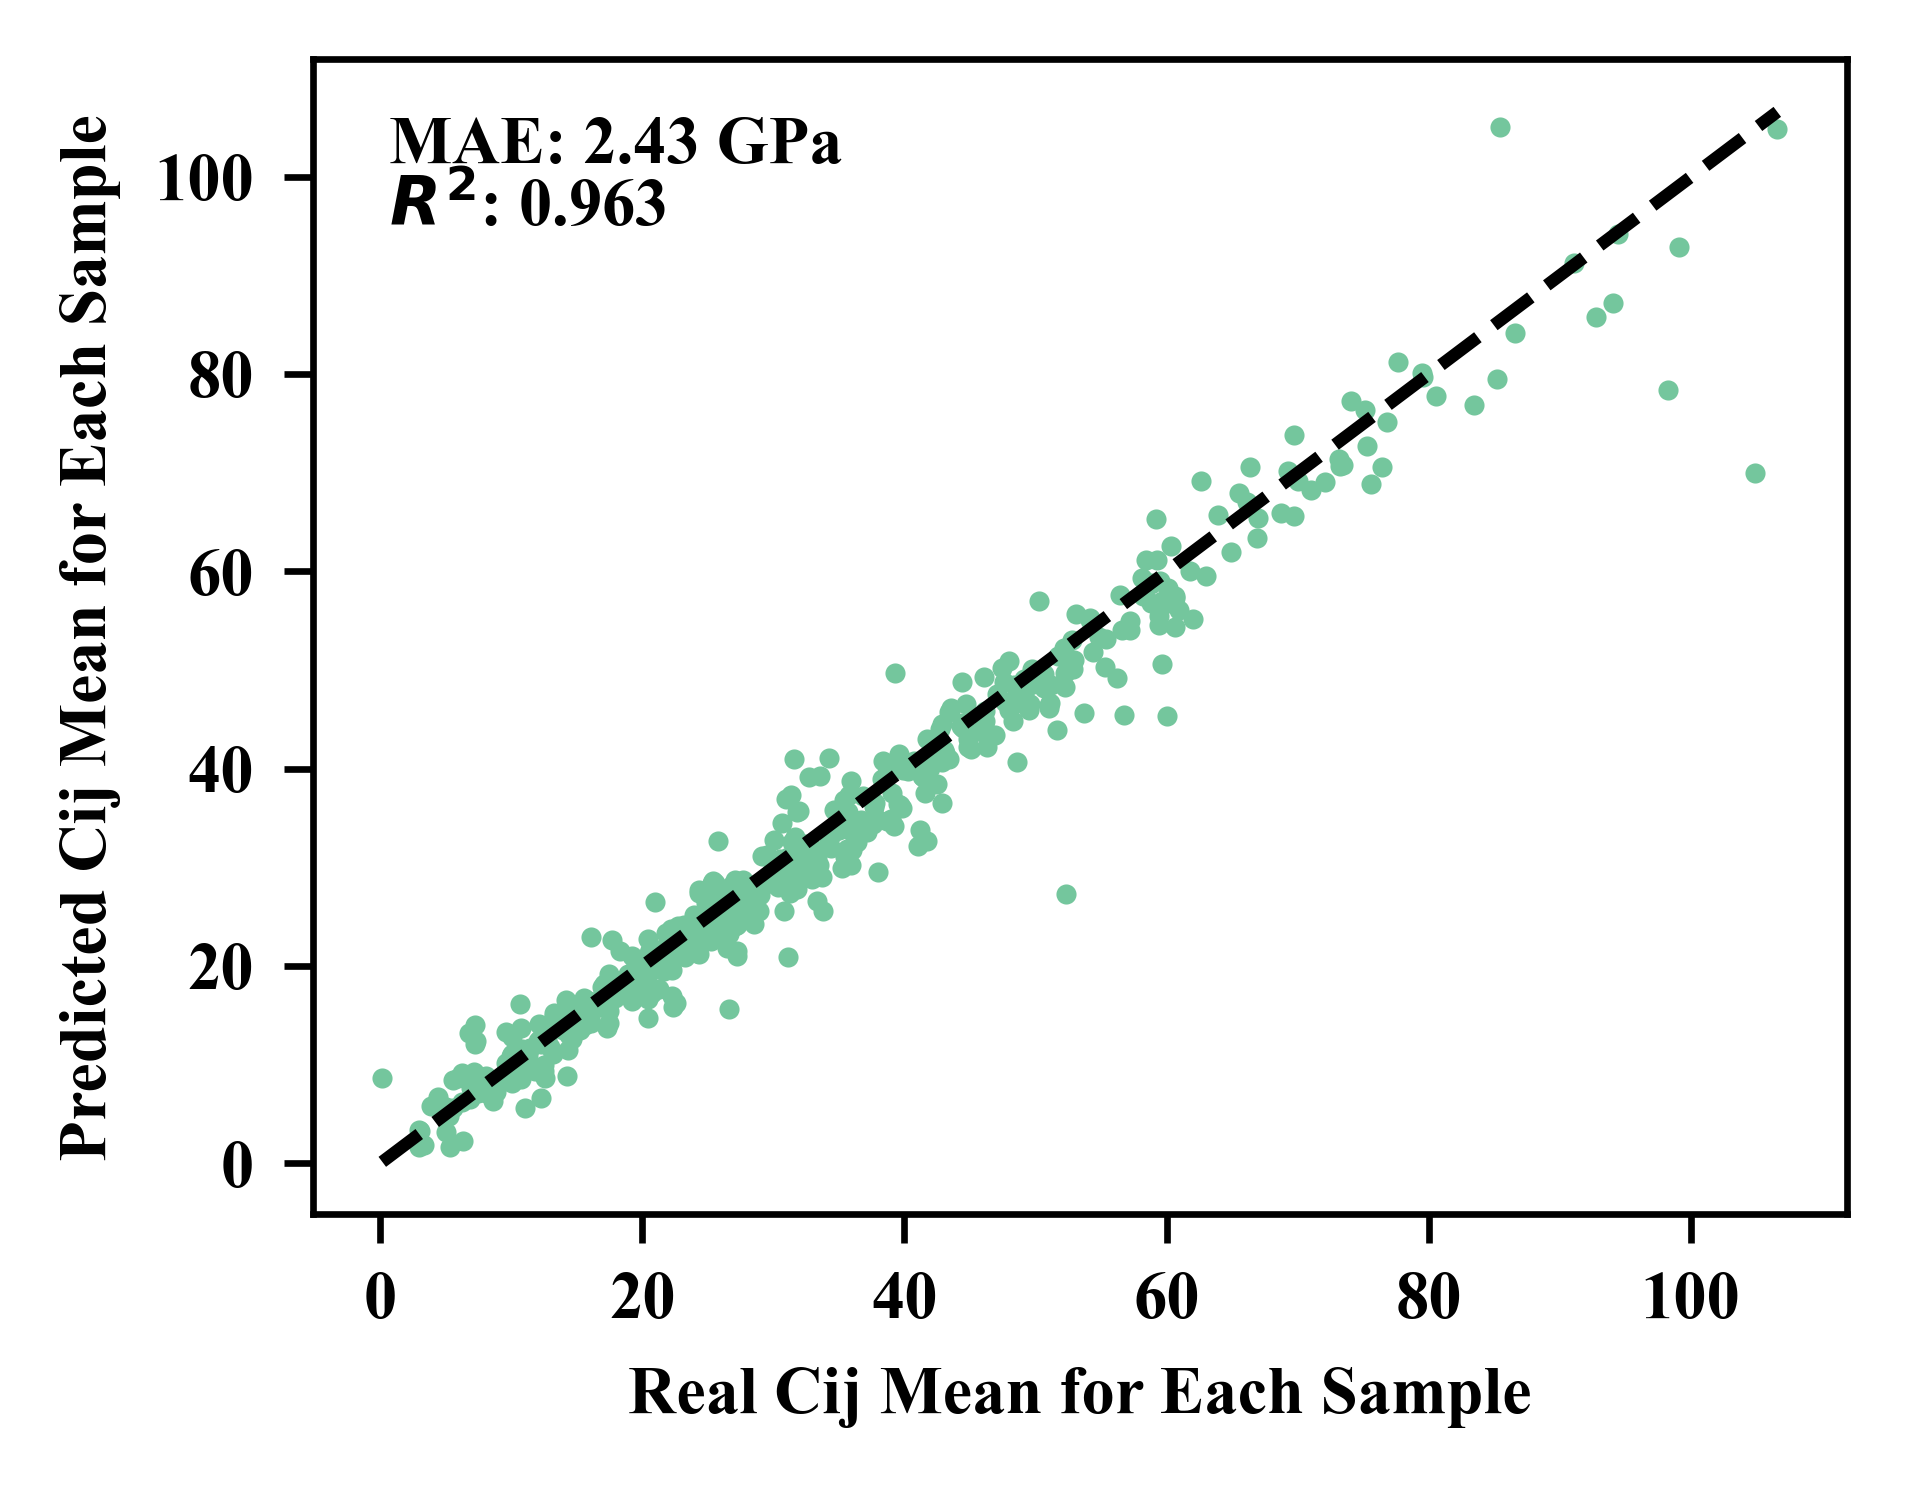

In [10]:
# MatTen
import matplotlib.pyplot as plt
plt.scatter(et_real_mean, et_predict_mean, color='#74c69d', s=2)  # Adjusted point size
plt.xlabel('Real Cij Mean for Each Sample')
plt.ylabel('Predicted Cij Mean for Each Sample')
plt.plot([min(et_real_mean), max(et_real_mean)], [min(et_real_mean), max(et_real_mean)], 'k--')  # y=x dashed line in black
plt.text(0.05, 0.95, 'MAE: 2.43 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.text(0.05, 0.90, r'$R^2$: 0.963', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.savefig("MatTen_scatter.pdf", dpi=600, bbox_inches='tight')
plt.show()

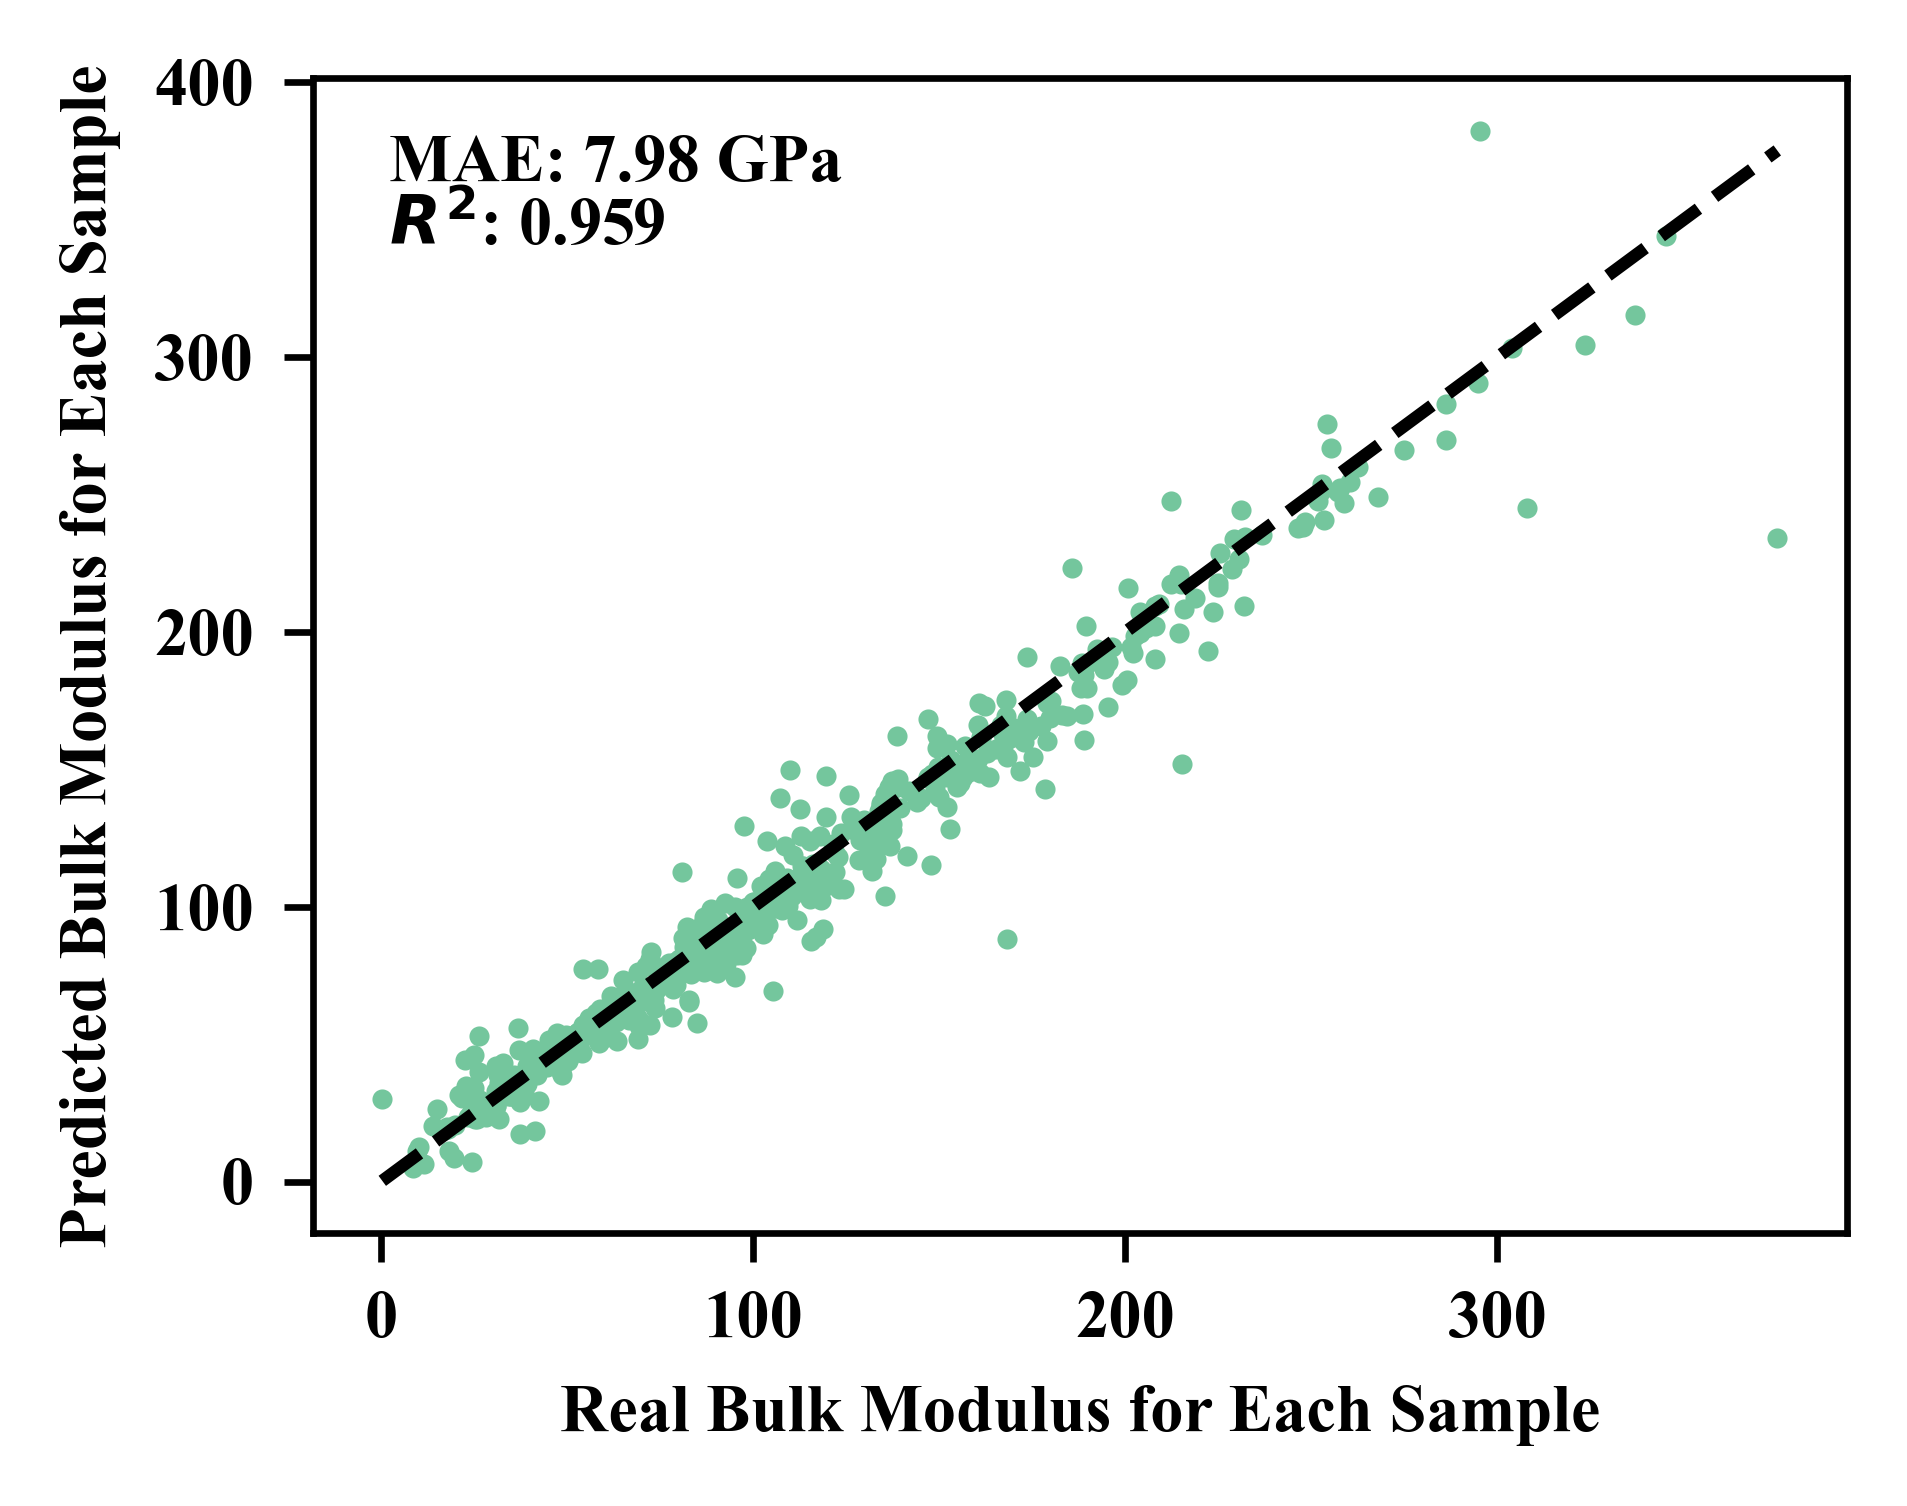

In [11]:
# MatTen_bulk
import matplotlib.pyplot as plt
plt.scatter(k_voigt_real, k_voigt_predict, color='#74c69d', s=2)  # Adjusted point size
plt.xlabel('Real Bulk Modulus for Each Sample')
plt.ylabel('Predicted Bulk Modulus for Each Sample')
plt.plot([min(k_voigt_real), max(k_voigt_real)], [min(k_voigt_real), max(k_voigt_real)], 'k--')  # y=x dashed line in black
plt.text(0.05, 0.95, 'MAE: 7.98 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.text(0.05, 0.90, r'$R^2$: 0.959', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.savefig("MatTen_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
plt.show()